In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [179]:
#Reading the csv data to dataframe
df = pd.read_csv('train.csv')

In [180]:
print(df.shape)
df.head(1)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [181]:
#Droping the duplicates
df = df.drop_duplicates()
df.shape

(1460, 81)

In [182]:
df.info()
# Some of the columns containing the null values we need to process the null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [183]:
# Getting the null percentage
null_percentage = 100 * df.isnull().mean()
null_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [184]:
# Removing the columns which have more than 40% of null values
columns_to_drop = null_percentage[null_percentage > 40].index.to_list()
df = df.drop(columns=columns_to_drop)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [185]:
# Getting total count null values
df[df.columns[df.isnull().any()]].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

<Axes: xlabel='LotFrontage', ylabel='Count'>

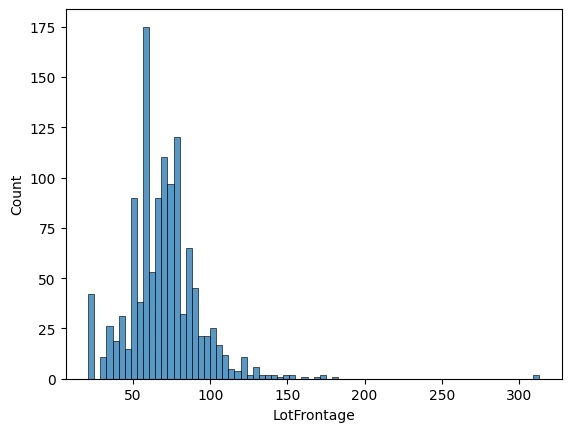

In [186]:
sns.histplot(df['LotFrontage'])

In [187]:
# Replacing the null values with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [188]:
df[df.columns[df.isnull().any()]].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [189]:

df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0.0, inplace=True)

df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

df['GarageCond'].fillna('No Garage',inplace=True)
df['GarageType'].fillna('No Garage',inplace=True)
df['GarageFinish'].fillna('No Garage',inplace=True)
df['GarageQual'].fillna('No Garage',inplace=True)

def garage_age(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
df['GarageAge']=df['GarageYrBlt'].apply(garage_age)

# Removing the null values for remaining colums as it contains only in small number
df = df.dropna(subset=["Electrical"])

In [190]:
# Verify no null values in Value
df[df.columns[df.isnull().any()]].isnull().sum()

GarageYrBlt    81
dtype: int64

In [191]:
#Describe the data to identify any anomalies

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageAge
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,...,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791,1.219328
std,421.411181,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,...,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025,0.531462
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000,1.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,2.000000
90%,1313.200000,120.000000,92.000000,14388.400000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1066.000000,...,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000,2.000000
95%,1387.100000,160.000000,104.000000,17402.300000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326200.000000,2.000000
99%,1445.420000,190.000000,137.420000,37593.680000,10.000000,9.000000,2009.000000,2009.000000,791.360000,1572.420000,...,285.840000,261.100000,168.000000,268.100000,0.000000,700.000000,12.000000,2010.000000,442629.620000,2.000000


In [192]:
# Removing anomalies from data

def remove_outliers(data, column):
  Q1 = data[column].quantile(0.1)
  Q3 = data[column].quantile(0.9)
  IQR = Q3 - Q1
  return data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]

df = remove_outliers(df, 'PoolArea')
df = remove_outliers(df, 'MiscVal')
df = remove_outliers(df, 'ScreenPorch')
df = remove_outliers(df, 'LotArea')
df = remove_outliers(df, 'MasVnrArea')
df = remove_outliers(df, 'SalePrice')

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageAge
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.0,1259.0,1259.0,1259.000000,1259.000000,1259.000000,1259.000000
mean,735.791898,57.501986,68.906275,9452.185862,6.067514,5.549643,1971.930103,1985.260524,91.159651,417.340747,...,45.925338,23.002383,3.699762,0.0,0.0,0.0,6.329627,2007.796664,175891.656871,1.231930
std,423.071494,42.852566,20.955190,3788.598320,1.362471,1.102695,30.671523,20.797581,148.331829,418.018958,...,63.608282,61.417341,30.252758,0.0,0.0,0.0,2.693719,1.324811,71011.803541,0.549806
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,2006.000000,34900.000000,0.000000
25%,370.000000,20.000000,60.000000,7336.000000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.000000,2007.000000,128000.000000,1.000000
50%,735.000000,50.000000,69.000000,9200.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,356.000000,...,25.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,2008.000000,159000.000000,1.000000
75%,1103.500000,70.000000,78.000000,11262.500000,7.000000,6.000000,2002.000000,2004.000000,153.500000,696.500000,...,68.000000,0.000000,0.000000,0.0,0.0,0.0,8.000000,2009.000000,210000.000000,2.000000
90%,1319.200000,120.000000,90.000000,13719.600000,8.000000,7.000000,2006.000000,2007.000000,305.200000,1013.200000,...,130.000000,114.000000,0.000000,0.0,0.0,0.0,10.000000,2010.000000,271920.000000,2.000000
95%,1388.100000,160.000000,100.100000,16035.600000,8.000000,8.000000,2007.000000,2007.000000,415.500000,1218.200000,...,169.100000,184.000000,0.000000,0.0,0.0,0.0,11.000000,2010.000000,319910.000000,2.000000
99%,1446.420000,190.000000,130.000000,21801.240000,9.000000,9.000000,2009.000000,2009.000000,644.200000,1461.680000,...,269.940000,261.100000,168.000000,0.0,0.0,0.0,12.000000,2010.000000,402919.380000,2.000000


In [193]:
#Removing the non relavant columns

not_relevant_columns = [
   'Id', 'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'
]

df = df.drop(columns=not_relevant_columns)

#Verify no null values before EDA
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [194]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,GarageAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,WD,Normal,208500,2
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,WD,Normal,181500,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,WD,Normal,223500,2
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,WD,Normal,250000,2


# EDA


In [195]:
#Getting the categorical and numerical columns
cat_cols = df.select_dtypes(['object']).columns
num_cols = df.select_dtypes(['float64', 'int64']).columns

## Univariate Analysis


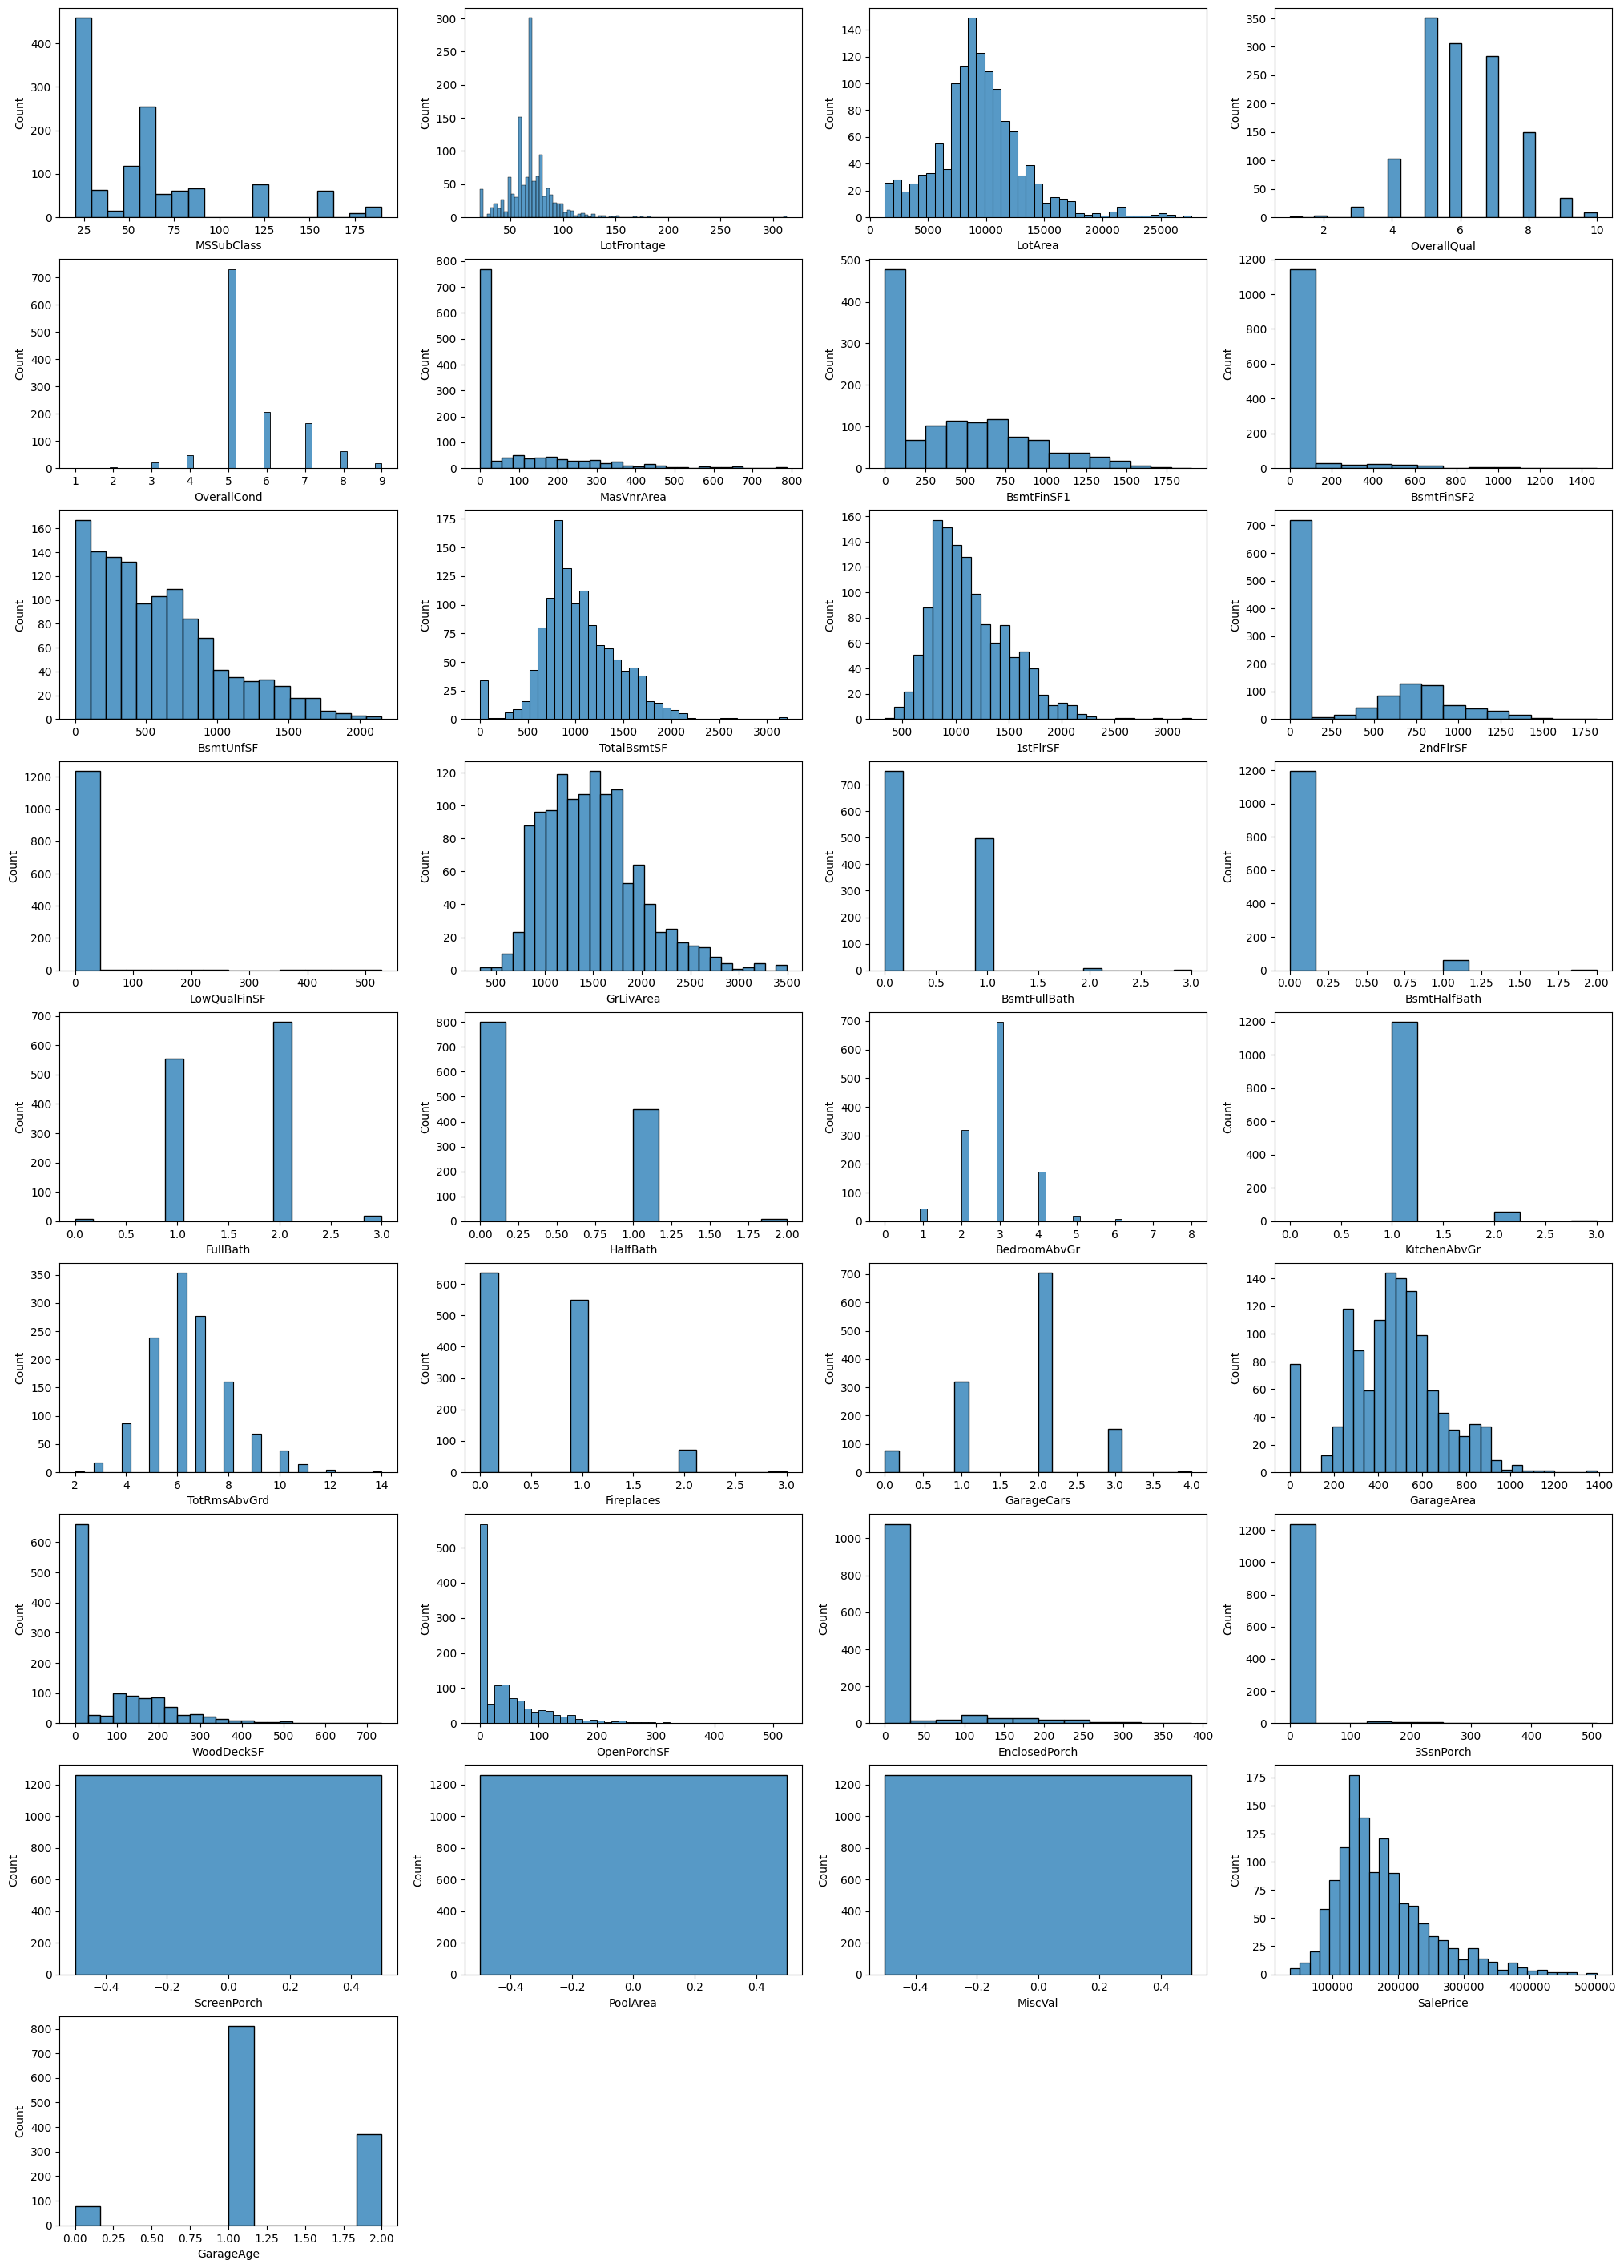

In [196]:
plt.figure(figsize=(25,40))
for i, v in enumerate(num_cols):
  plt.subplot(10,4,i+1)
  sns.histplot(x=df[v])
plt.show()

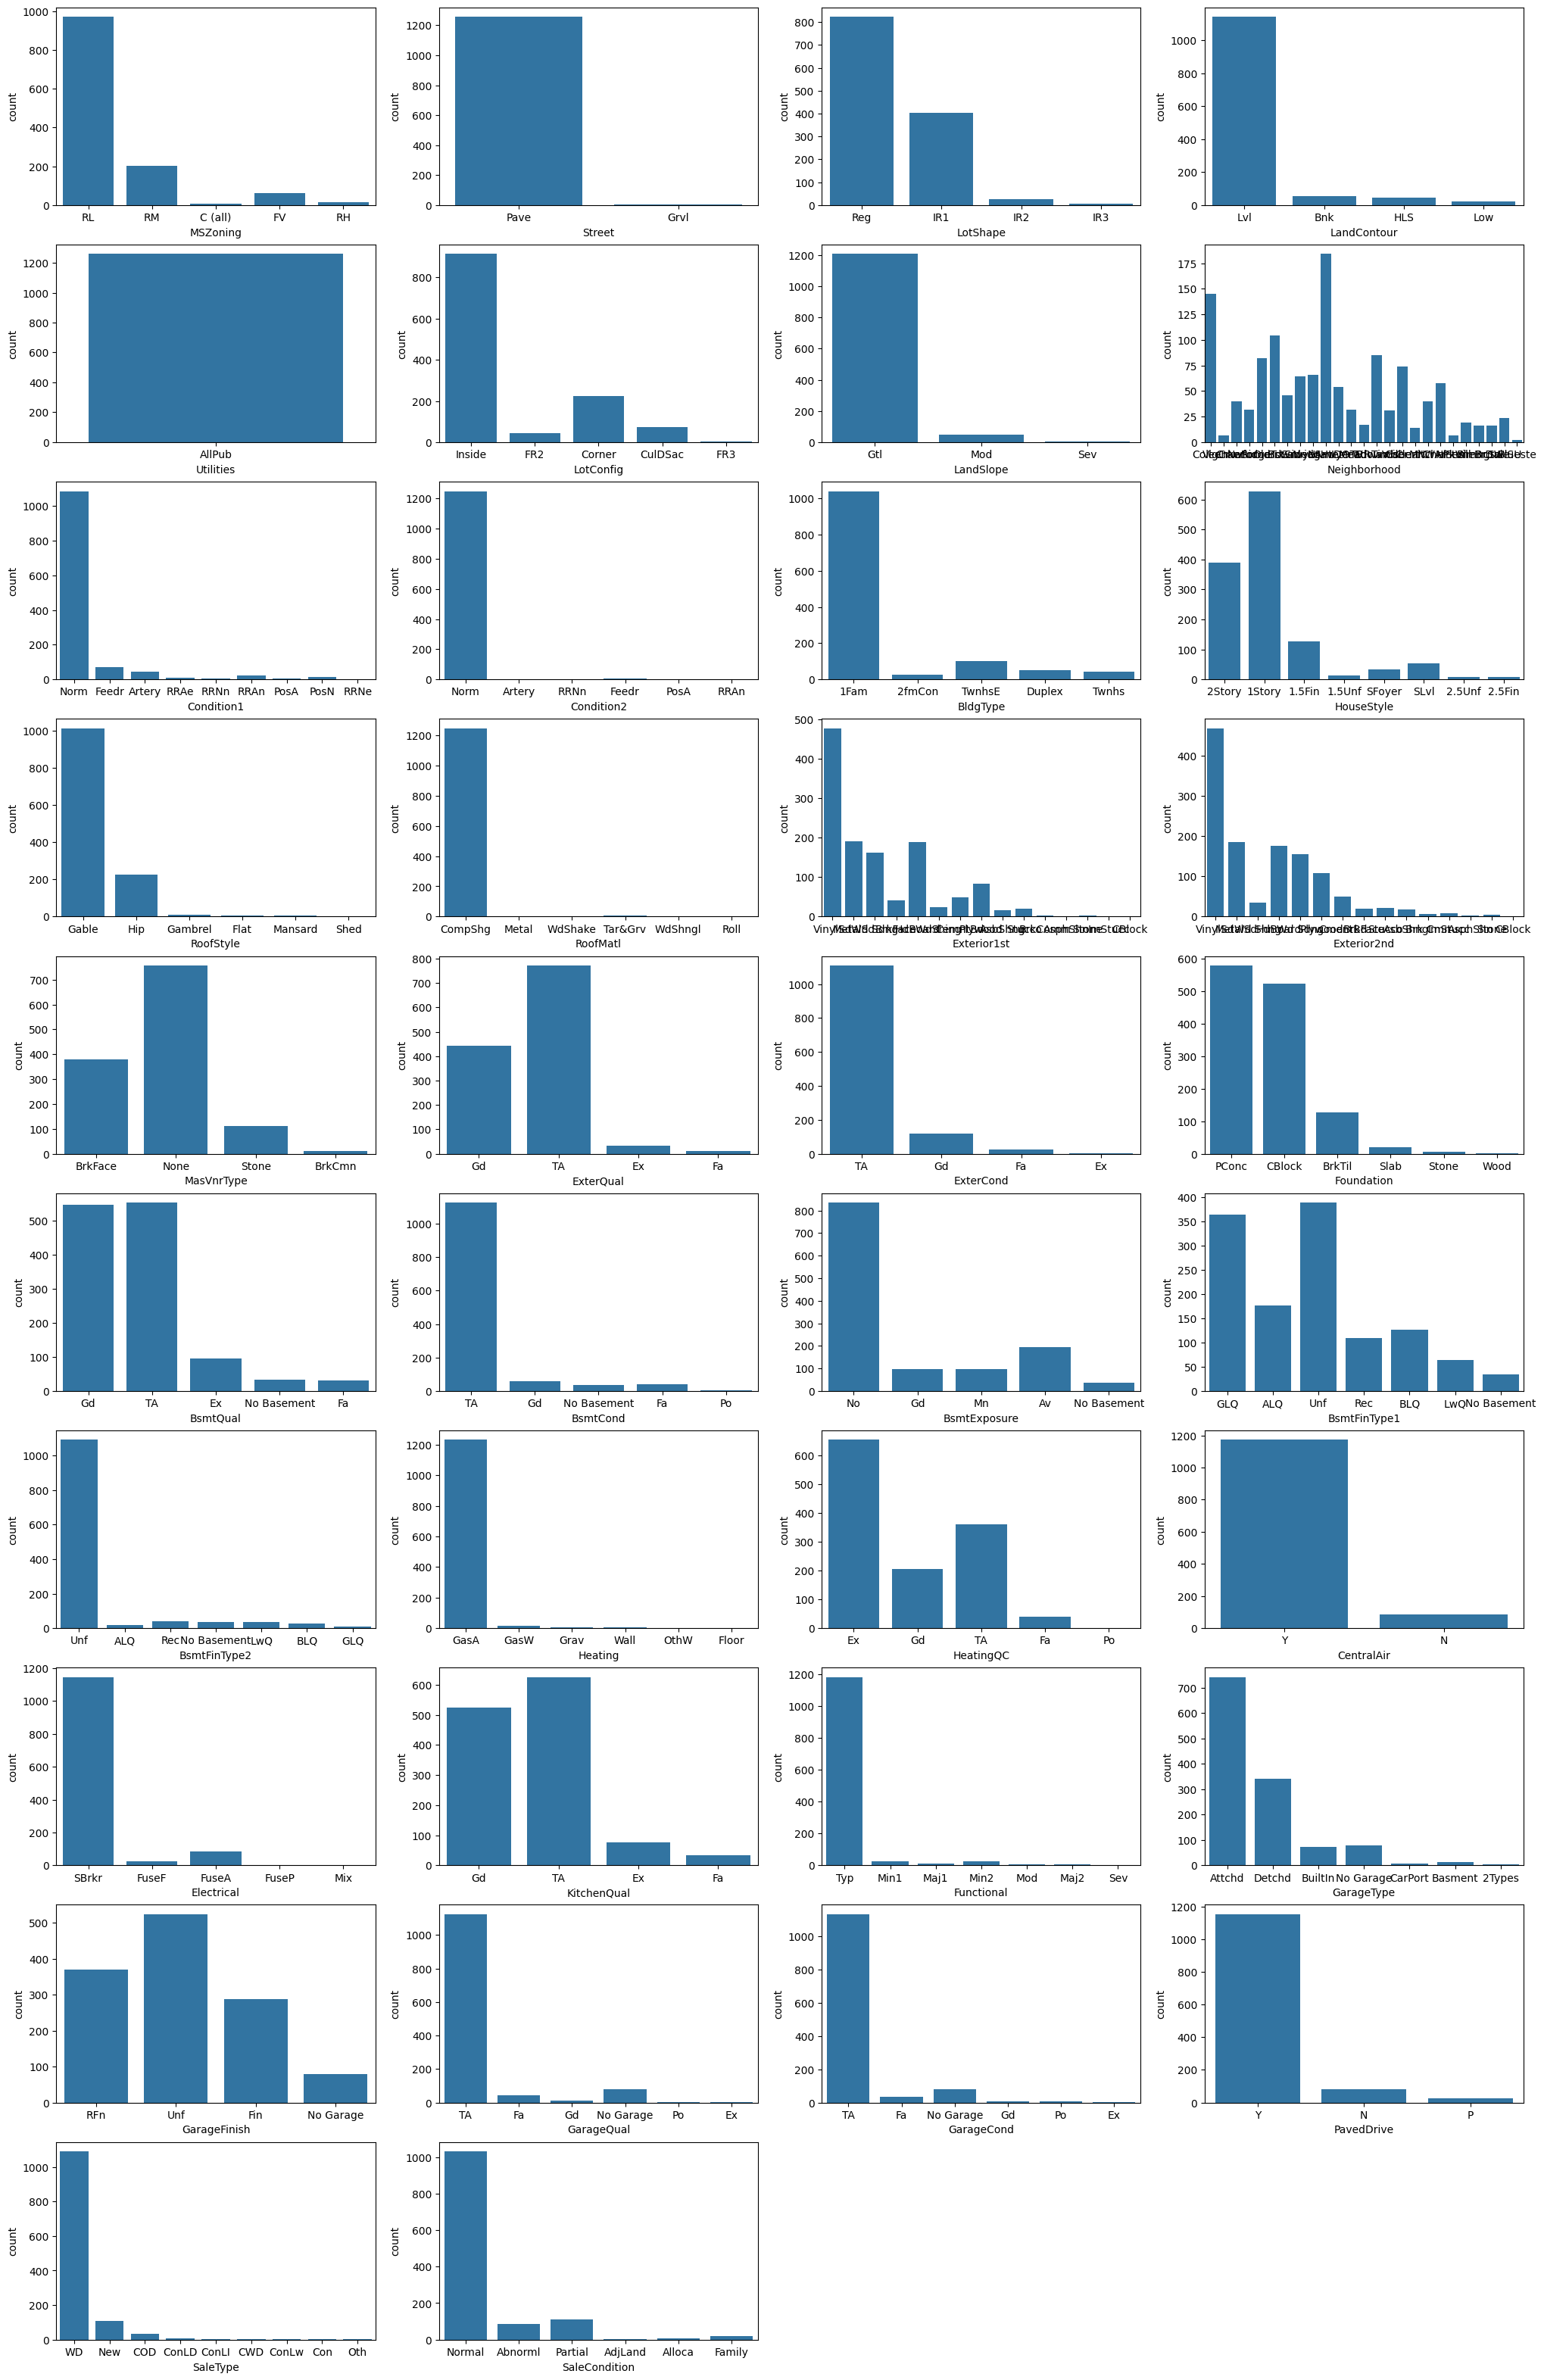

In [197]:
plt.figure(figsize=(25,40))
for i, v in enumerate(cat_cols):
  plt.subplot(10,4,i+1)
  sns.countplot(x=df[v])
plt.show()

## Bivariate Analysis

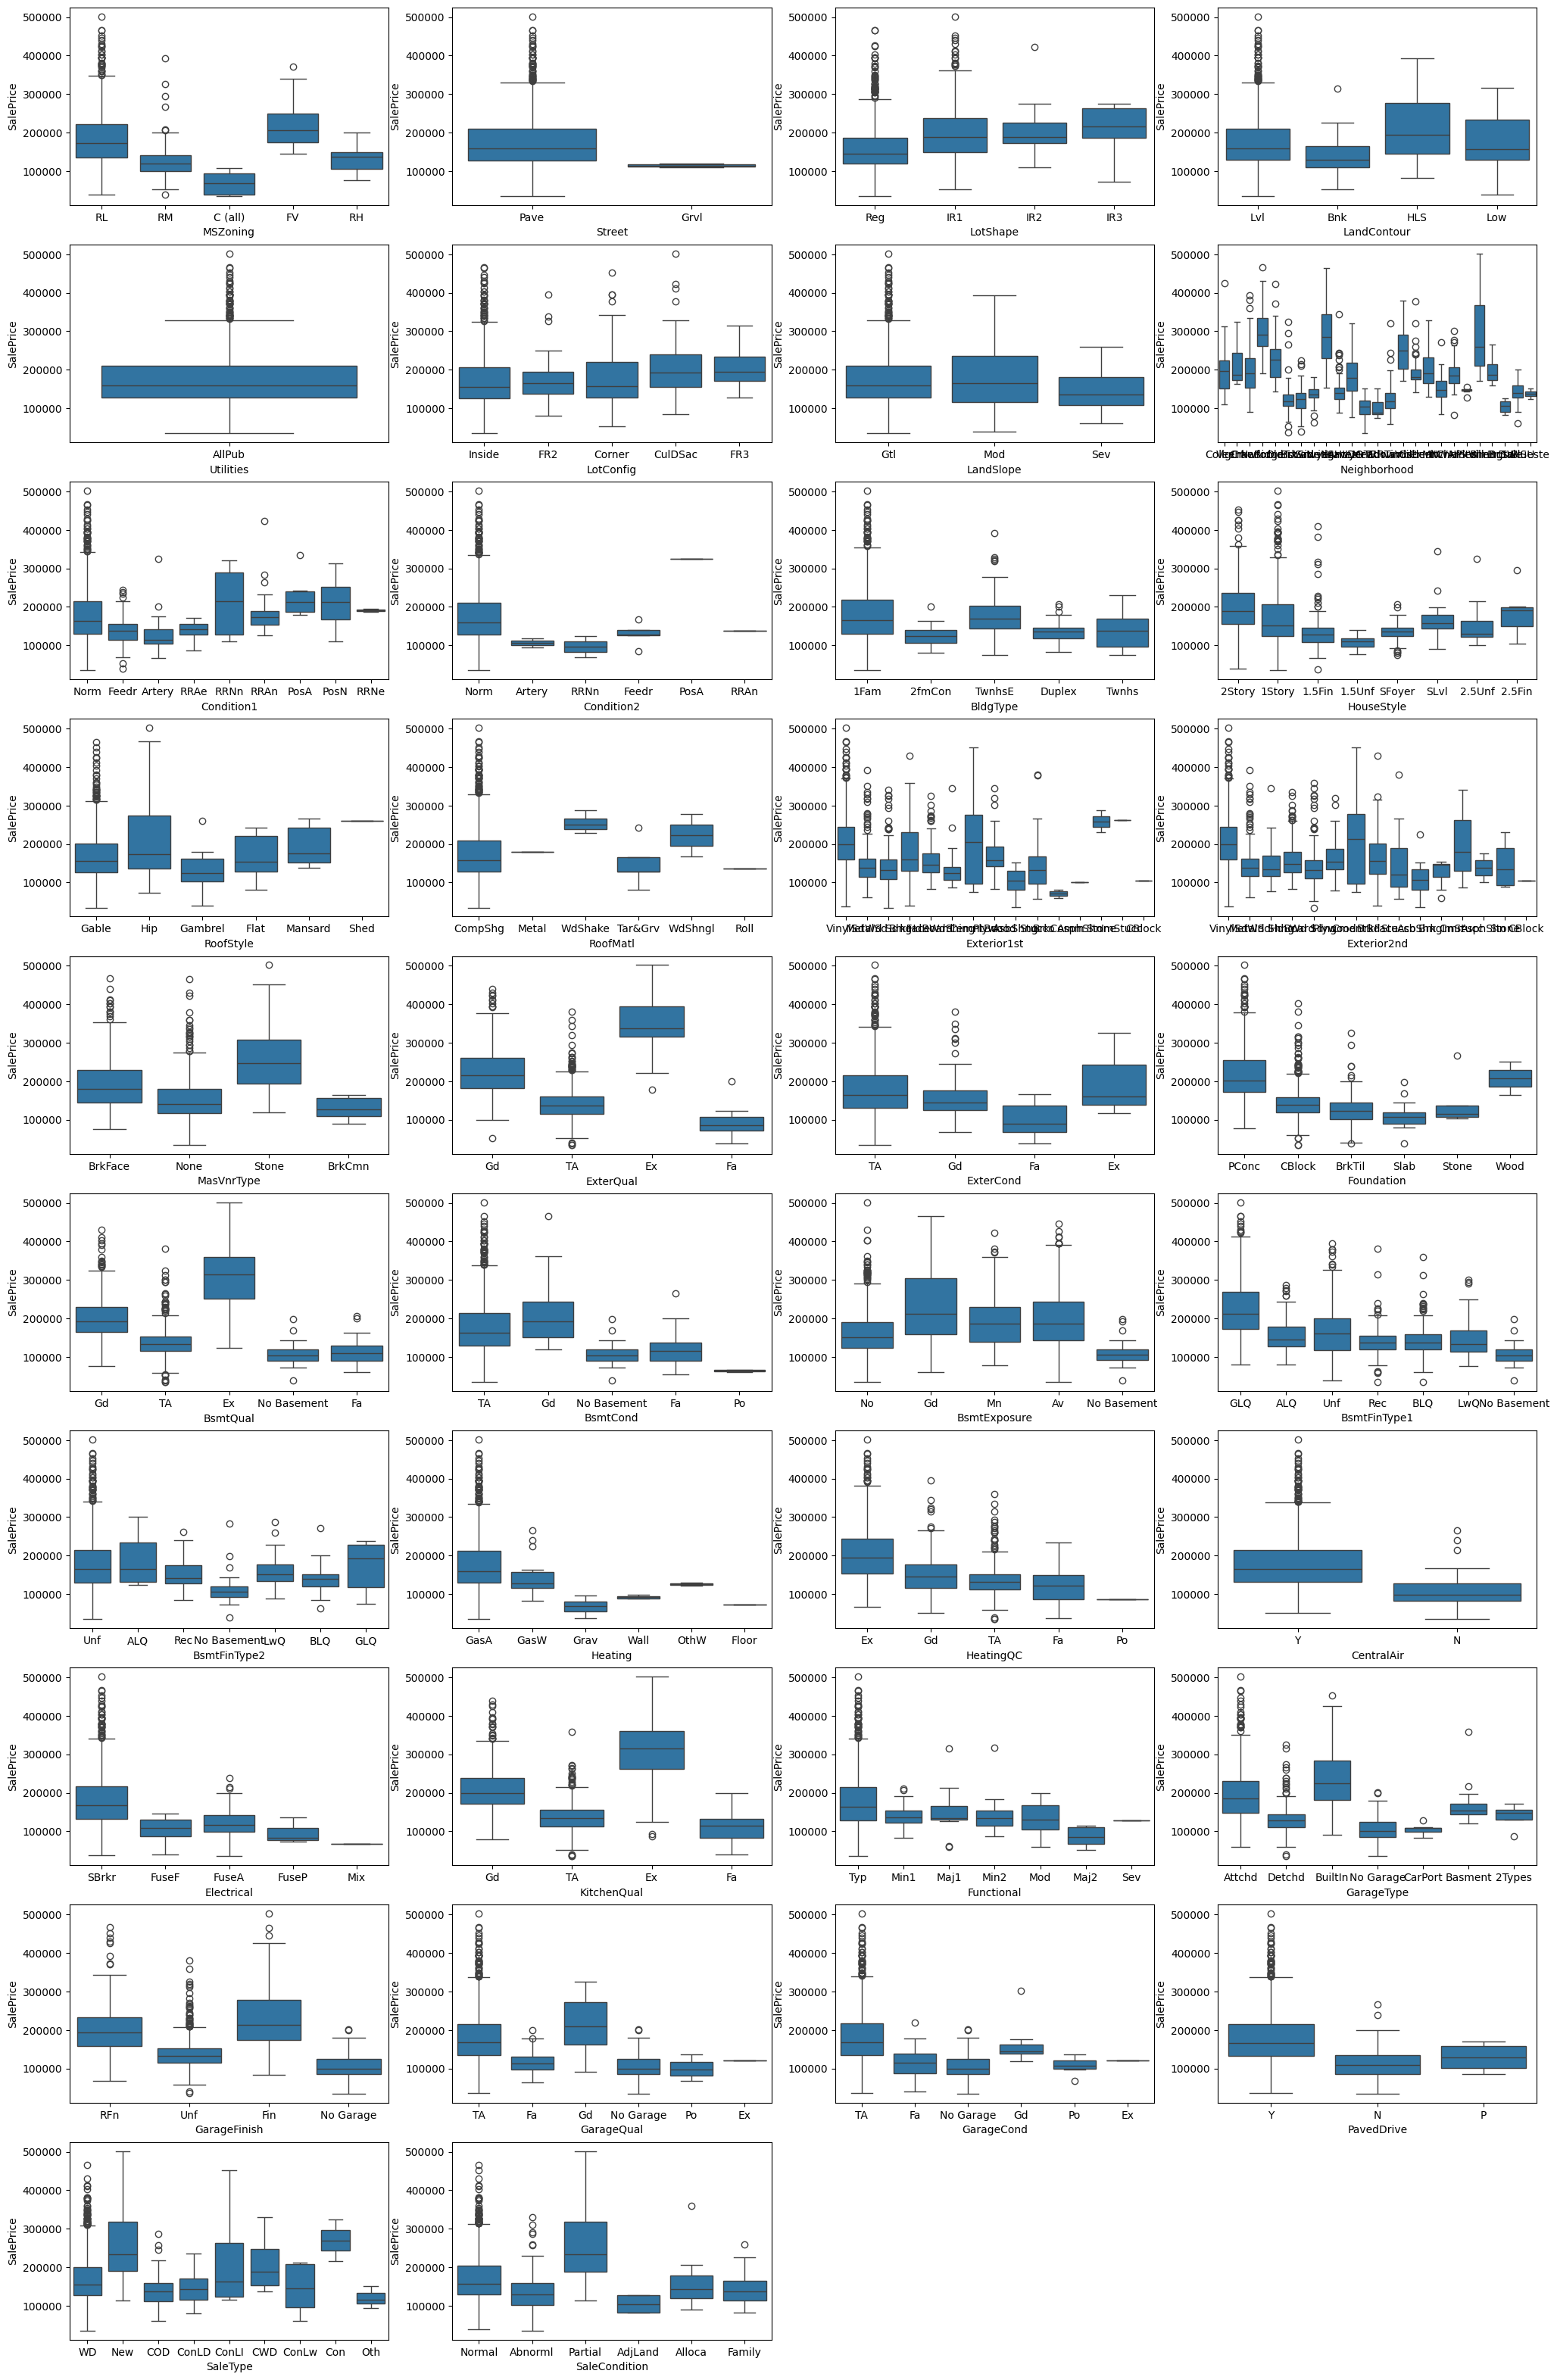

In [198]:
plt.figure(figsize=(25,40))
for i, v in enumerate(cat_cols):
  plt.subplot(10,4,i+1)
  sns.boxplot(x = v, y = 'SalePrice', data = df)
plt.show()

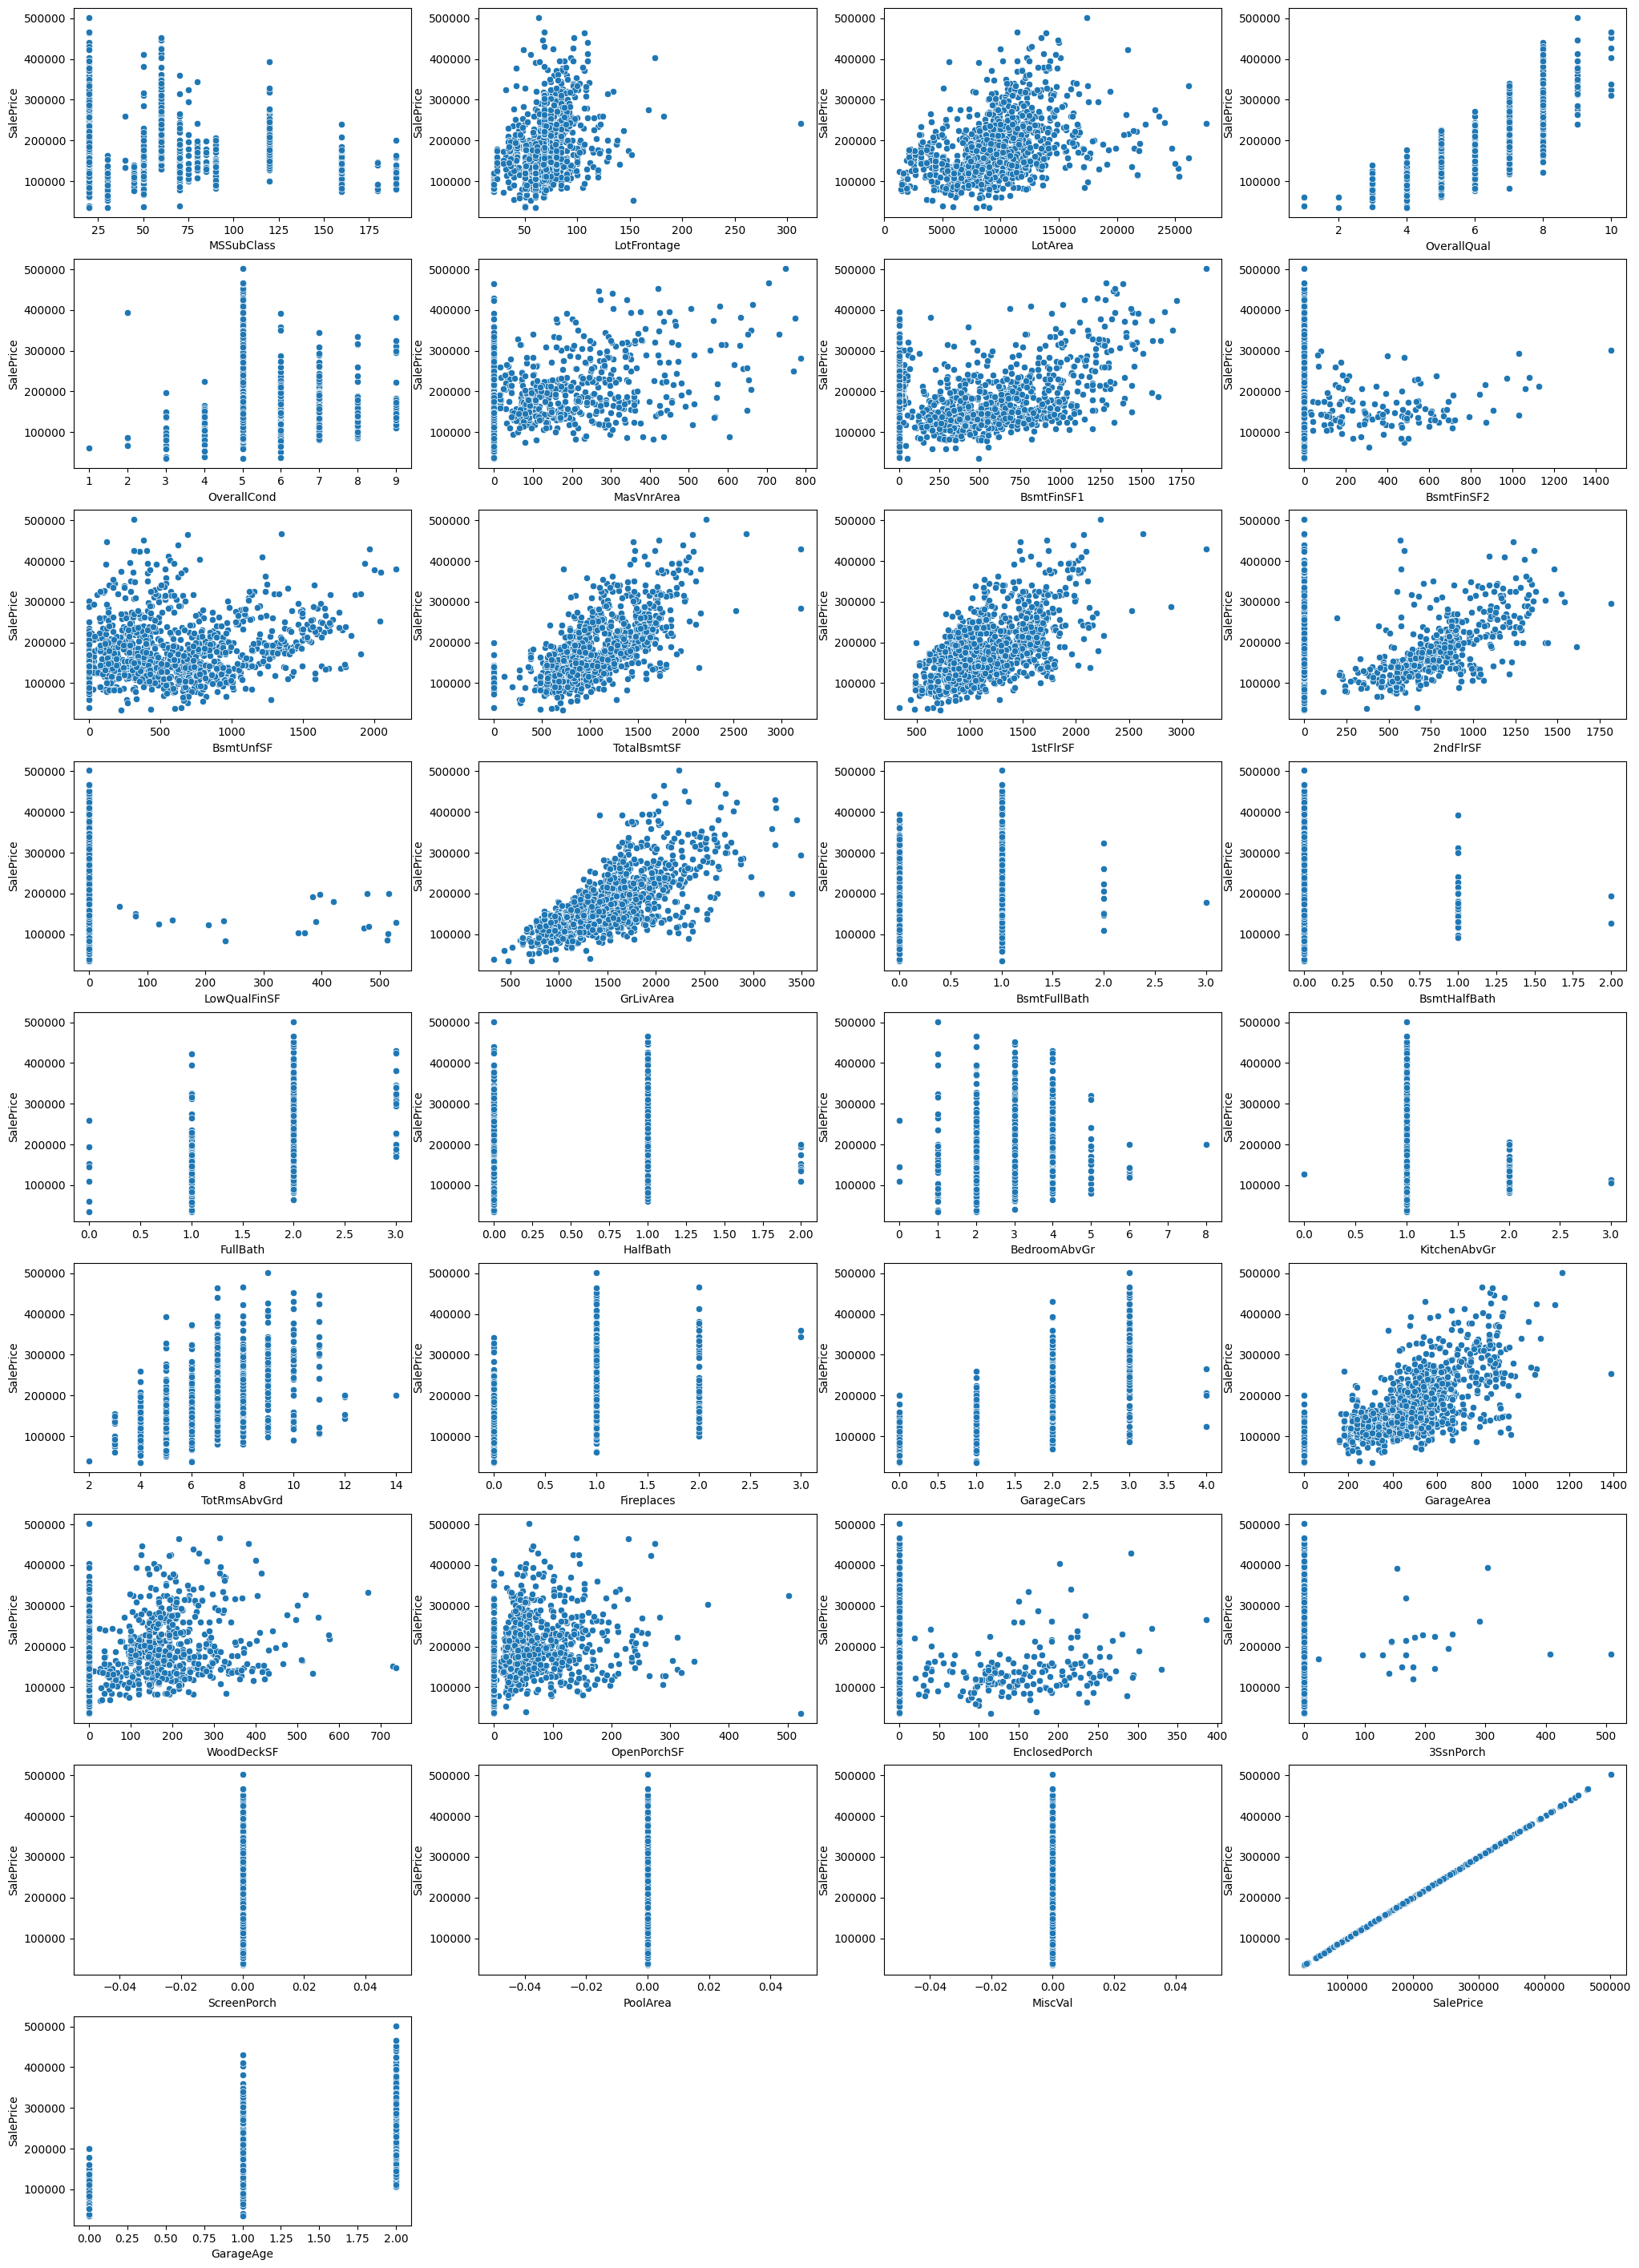

In [199]:
plt.figure(figsize=(25,40))
for i, v in enumerate(num_cols):
  plt.subplot(10,4,i+1)
  sns.scatterplot(x = v, y = 'SalePrice', data = df)
plt.show()

In [200]:
# Dummy for categorical columns

df_dummy = pd.get_dummies(df[cat_cols],drop_first=True)
df = pd.concat([df,df_dummy], axis=1)
df = df.drop(cat_cols, axis=1)

In [201]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [202]:
from sklearn.model_selection import train_test_split

In [203]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1459
Columns: 231 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(31), uint8(198)
memory usage: 577.9 KB


In [205]:
num_cols=df.select_dtypes(exclude='uint8').columns

In [206]:
from sklearn.preprocessing import MinMaxScaler


In [207]:
scaler = MinMaxScaler()


In [208]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [209]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [210]:
y_test=df_test.pop('SalePrice')
X_test=df_test

In [211]:
from sklearn.metrics import mean_squared_error,r2_score

# Ridge Regression

In [212]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [213]:
params = {
    'alpha': [
        0.0001,
        0.001,
        0.01,
        0.1,
        0.2,
        0.3,
        0.4,
        0.5,
        0,
        1,
        2,
        3,
        4,
        5,
        10,
        100,
        1000,
        10000
    ]
}
ridge_model_cv=GridSearchCV(estimator=Ridge(),
                           param_grid=params,
                           scoring='r2',
                           cv=5,
                           return_train_score=True,
                           verbose=1)
ridge_model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0, 1, 2, 3, 4, 5, 10, 100, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [214]:
print(ridge_model_cv.best_params_)

{'alpha': 3}


In [215]:
ridge=Ridge(alpha=3)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))


0.9471842372903766


In [216]:
mean_squared_error(y_train, y_train_pred)


0.0011696610159728288

In [217]:
y_test_pred=ridge.predict(X_test)

In [218]:
r2_score(y_test, y_test_pred)

0.9054236799572396

In [219]:
mean_squared_error(y_test, y_test_pred)

0.0023896480772863777

Text(0.5, 0, 'error')

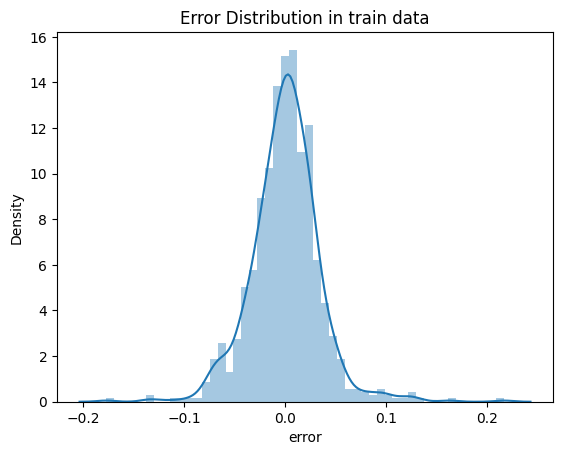

In [220]:
sns.distplot(y_train - y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

Text(0.5, 0, 'error')

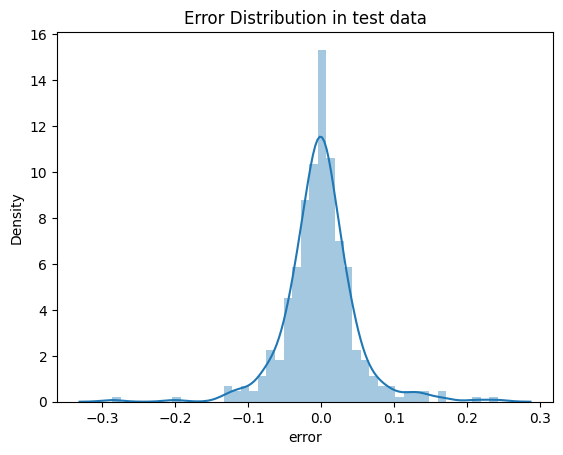

In [221]:
sns.distplot(y_test - y_test_pred)
plt.title('Error Distribution in test data')
plt.xlabel('error')

In [222]:
# Doubling the alpha to understand the changes
ridge=Ridge(alpha=3 * 2)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("r2_score train: ",r2_score(y_train, y_train_pred))

print("mean_squared_error train data: ", mean_squared_error(y_train, y_train_pred))

y_test_pred=ridge.predict(X_test)
print("r2_score test: ", r2_score(y_test, y_test_pred))
print("mean_squared_error test data: ", mean_squared_error(y_test, y_test_pred))

r2_score train:  0.9416272841897471
mean_squared_error train data:  0.0012927256291855678
r2_score test:  0.9031213458917189
mean_squared_error test data:  0.0024478208648346248


In [223]:
ridge_dict = dict(zip(X_train.columns,ridge.coef_))

final_dict={}
for i in ridge_dict:
  final_dict[i]= ridge_dict[i]

final_dict = {k: v for k, v in sorted(final_dict.items(), key=lambda item: item[1])}

print("{:<30} {:<15}".format('Coef','Value'))
for k, v in final_dict.items():
    print("{:<30} {:<15}".format(k, v))

Coef                           Value          
KitchenQual_TA                 -0.0390363606126573
BsmtQual_TA                    -0.035635694060611865
BsmtQual_Gd                    -0.03318906773475706
ExterQual_TA                   -0.03290970320566578
KitchenQual_Gd                 -0.0326616304997158
KitchenQual_Fa                 -0.03134933767226191
MSSubClass                     -0.030530742948205663
BsmtQual_Fa                    -0.029764299058495005
ExterQual_Gd                   -0.02627404673084502
Neighborhood_Edwards           -0.026114867246258666
Neighborhood_Mitchel           -0.026075329320395392
Neighborhood_Gilbert           -0.02321726210845944
Neighborhood_MeadowV           -0.022544620180079664
Condition1_RRAe                -0.02245202540852414
BldgType_Duplex                -0.02227032256186928
Neighborhood_NAmes             -0.019707034632135398
KitchenAbvGr                   -0.01964361138858601
BldgType_Twnhs                 -0.01952946293083224
LandContour_

# Lasso Regression

In [224]:
from sklearn.linear_model import Lasso


In [225]:
params = {
    'alpha': [
        0.0001,
        0.001,
        0.01,
        0.1,
        0.2,
        0.3,
        0.4,
        0.5,
        0,
        1,
        2,
        3,
        4,
        5,
        10,
        100,
        1000,
        10000
    ]
}
lasso_model_cv=GridSearchCV(estimator=Lasso(),
                           param_grid=params,
                           scoring='r2',
                           cv=5,
                           return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0, 1, 2, 3, 4, 5, 10, 100, 1000, 10000]},
             return_train_score=True, scoring='r2', verbose=1)

In [226]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [227]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print(r2_score(y_train, y_train_pred))


0.9460910277463316


In [228]:
mean_squared_error(y_test, y_test_pred)

0.0024478208648346248

In [229]:
y_test_pred=lasso.predict(X_test)

In [230]:
r2_score(y_test, y_test_pred)

0.905802161592979

In [231]:
mean_squared_error(y_test, y_test_pred)

0.0023800850290230918

In [232]:
lasso_dict = dict(zip(X_train.columns,lasso.coef_))

final_dict={}
for i in lasso_dict:
    if lasso_dict[i] != 0:
        final_dict[i]= lasso_dict[i]

final_dict = {k: v for k, v in sorted(final_dict.items(), key=lambda item: item[1])}

print("{:<30} {:<15}".format('Coef','Value'))
for k, v in final_dict.items():
    print("{:<30} {:<15}".format(k, v))


Coef                           Value          
MSSubClass                     -0.03930175312559986
KitchenQual_TA                 -0.03874873814970447
KitchenQual_Fa                 -0.037315532967156236
BsmtQual_Gd                    -0.035745296801491515
BsmtQual_TA                    -0.03534750248877809
KitchenQual_Gd                 -0.03459478799476179
Condition1_RRAe                -0.029987997421839583
BsmtQual_Fa                    -0.029818569773440138
ExterQual_Gd                   -0.027463749070790303
ExterQual_TA                   -0.027251966319426866
BldgType_Duplex                -0.025444926489917512
Functional_Sev                 -0.02394313881948448
Neighborhood_Mitchel           -0.02228972914718833
LandContour_Low                -0.02151029172955014
Neighborhood_Edwards           -0.021484221079879386
BedroomAbvGr                   -0.020361494116383543
LowQualFinSF                   -0.020042340156196988
Neighborhood_OldTown           -0.019055206794303843
Kitche

Text(0.5, 0, 'error')

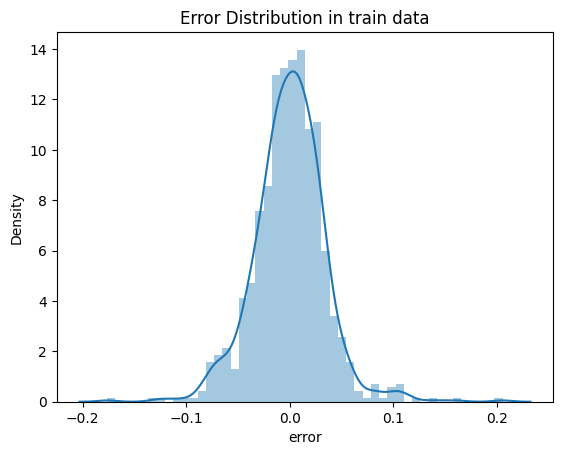

In [233]:
sns.distplot(y_train - y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

Text(0.5, 0, 'error')

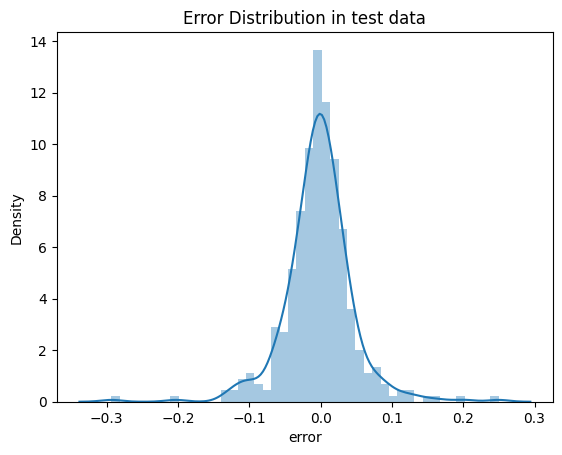

In [234]:
sns.distplot(y_test - y_test_pred)
plt.title('Error Distribution in test data')
plt.xlabel('error')

In [235]:
# Doubling the alpha to understand the changes
lasso=Lasso(alpha=0.0001 * 2)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print("r2_score train: ",r2_score(y_train, y_train_pred))

print("mean_squared_error train data: ", mean_squared_error(y_train, y_train_pred))

y_test_pred=lasso.predict(X_test)
print("r2_score test: ", r2_score(y_test, y_test_pred))
print("mean_squared_error test data: ", mean_squared_error(y_test, y_test_pred))


r2_score train:  0.9404127598803985
mean_squared_error train data:  0.0013196225566313871
r2_score test:  0.9049542043258593
mean_squared_error test data:  0.0024015102594832907


In [236]:
lasso_dict = dict(zip(X_train.columns,lasso.coef_))

final_dict={}
for i in lasso_dict:
  if lasso_dict[i] != 0:
    final_dict[i]= lasso_dict[i]

final_dict = {k: v for k, v in sorted(final_dict.items(), key=lambda item: item[1])}

print("{:<30} {:<15}".format('Coef','Value'))
for k, v in final_dict.items():
  print("{:<30} {:<15}".format(k, v))

Coef                           Value          
MSSubClass                     -0.03926197257270819
KitchenQual_TA                 -0.03654140471680185
BsmtQual_TA                    -0.03386647237497216
BsmtQual_Gd                    -0.033101218695038244
KitchenQual_Fa                 -0.03285373294288113
KitchenQual_Gd                 -0.031029605885001987
ExterQual_TA                   -0.026971444449474222
BldgType_Duplex                -0.02472375219230393
ExterQual_Gd                   -0.023654664532269176
BsmtQual_Fa                    -0.02331581691673281
Condition1_RRAe                -0.019188187350097755
Neighborhood_Mitchel           -0.01581974367461917
LandContour_Low                -0.01551639350292597
GarageQual_Fa                  -0.015311501990165233
Neighborhood_Edwards           -0.015167170234715829
Neighborhood_OldTown           -0.012984447327497543
Neighborhood_NAmes             -0.010697710133194746
BsmtExposure_No                -0.010555738703531867
LowQual